In [ ]:
# Load 10,000 simulation results

In [1]:
import json, os 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
proj_dir = f'/zfs/projects/faculty/sjc-recombinant-search/' 

## Helper Function

In [3]:
def check_combined_file(combined_file_path, expected_seeds=10000):
    """
    Check if the combined file exists and has the expected number of seeds.
    If the file exists and has 10,000 seeds, load it into 'data' and return it.
    """
    if os.path.exists(combined_file_path):
        with open(combined_file_path, 'r') as file:
            combined_data = json.load(file)
            if len(combined_data) >= expected_seeds:
                print(f"Combined file already exists with {len(combined_data)} seeds. Loading the data.")
                return combined_data
            else:
                print(f"Combined file exists but has only {len(combined_data)} seeds. Need to recombine.")
    return None

def combine_json_files(directory_path):
    combined_data = {}

    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                combined_data.update(data)

    return combined_data

In [4]:
def plot_search_history(data, seed):
    """
    Plot all iterations for a given seed, accumulating points for history and derivative points.
    """
    print(f'Plotting path for seed {seed}')
    # Print the JSON data in a pretty format
    print(json.dumps(data[seed], indent=4))
    # Initialize cumulative lists for the history and derivative points
    cumulative_history = [(0, 0)]  # Start with (0, 0) for the initial point in history
    cumulative_derivative_points = []
    
    # Get the number of iterations from the 'novelhistory' list length
    num_iterations = len(data[seed]['novelhistory'])

    # Iterate over all iterations for the given seed
    for iteration in range(num_iterations):
        # Get novel point for current iteration
        novel_point = data[seed]['novelhistory'][iteration]
        
        # Accumulate history from the 'history' dictionary
        current_history = [tuple(point) for point in data[seed]['history_iter'].get(str(iteration), [])]
        cumulative_history += current_history
        
        # Accumulate derivative points if they exist
        current_derivative_points = [tuple(point) for point in data[seed].get('derivative_history', {}).get(str(iteration), [])]
        cumulative_derivative_points += current_derivative_points

        # Plotting
        plt.figure(figsize=(5, 4))
        
        # Plot the cumulative history points in black
        if cumulative_history:
            plt.scatter(*zip(*cumulative_history), label='History Points', color='black')
        
        # Plot the cumulative derivative points in green
        if cumulative_derivative_points:
            plt.scatter(*zip(*cumulative_derivative_points), label='Derivative Points', color='green')
        
        # Plot the current novel point in red
        plt.scatter(novel_point[0], novel_point[1], label='Novel Point', color='red')
        
        plt.title(f'Seed {seed} Iter: {iteration:03}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))
        plt.grid(True)
        
        # Show the plot for this iteration
        plt.show()

## Check if file with 10,000 seeds already exists

In [5]:
results_dir = f'{proj_dir}/nrapstin/new-preference/staple_0'
combined_file_path = f'{results_dir}/combined_run_results.json'

In [6]:
# Check if the file exists and contains 10,000 seeds
data = check_combined_file(combined_file_path, expected_seeds=10000)

if data is None:
    # If the file does not exist or has fewer than 10,000 seeds, proceed with combining
    data = combine_json_files(f'{results_dir}/results')

    # Write the combined data to the JSON file
    with open(combined_file_path, 'w') as combined_file:
        json.dump(data, combined_file, indent=4)

    print(f"Combined data written to {combined_file_path}.")
else:
    print("Loaded data from the existing combined file.")

# Now 'data' contains the combined data, either loaded from the file or newly created.

Combined file already exists with 10000 seeds. Loading the data.
Loaded data from the existing combined file.


In [7]:
len(data.keys())

10000

## Plot history for a chosen seed

In [8]:
seed_to_plot = 6278

Plotting path for seed 6278
{
    "history": [
        [
            0.10000001181173529,
            0
        ],
        [
            0,
            0.09590841958504852
        ],
        [
            0.10000001181173529,
            0.0849828725387181
        ],
        [
            0,
            0.0849828725387181
        ],
        [
            0,
            0.0797947306016768
        ],
        [
            0.10000001181173529,
            0.0797947306016768
        ],
        [
            0,
            0.0808981844473441
        ],
        [
            0.10000001181173529,
            0.0808981844473441
        ],
        [
            0,
            0.08238236085946511
        ],
        [
            0.10000001181173529,
            0.08238236085946511
        ],
        [
            0,
            0.08258609081723378
        ],
        [
            0.10000001181173529,
            0.08258609081723378
        ],
        [
            0,
            0.08281618738732

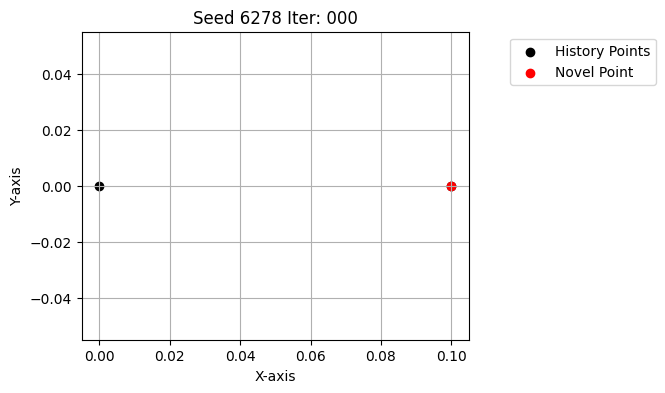

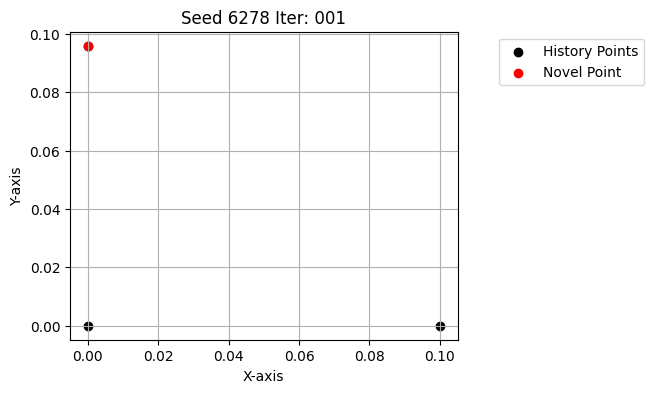

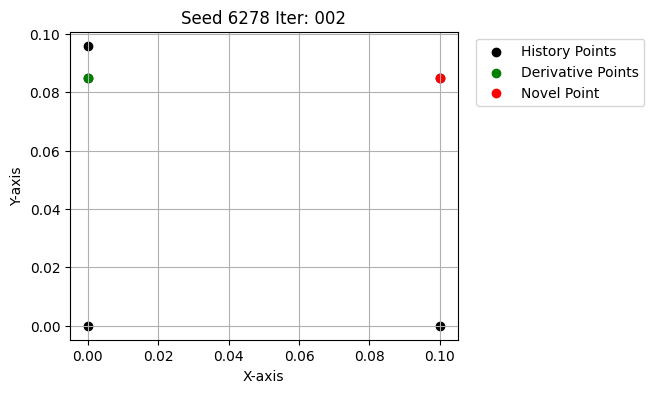

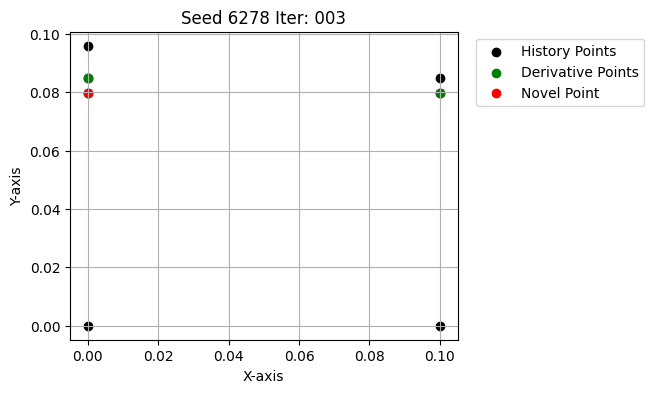

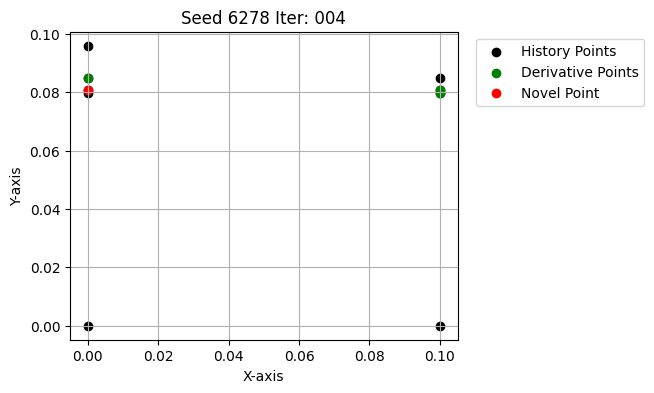

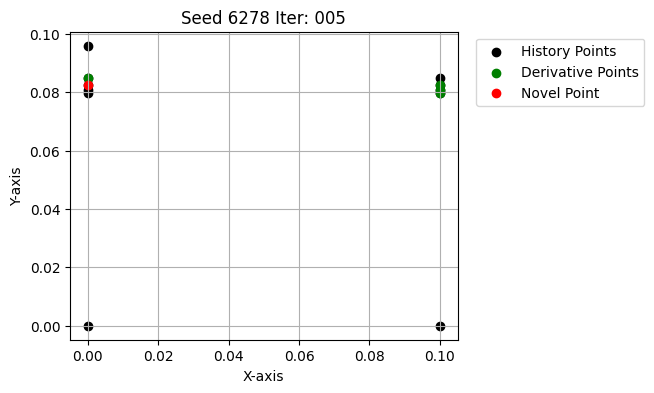

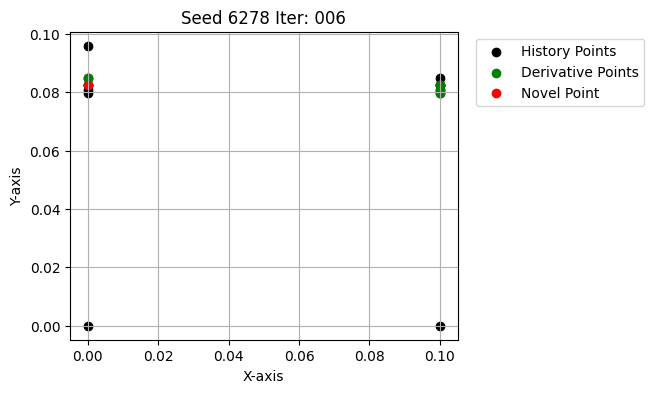

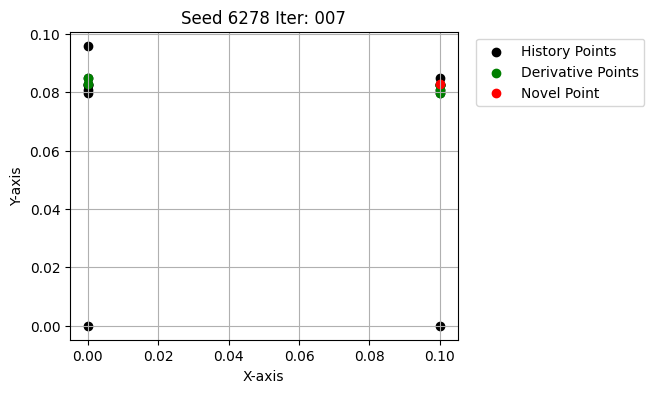

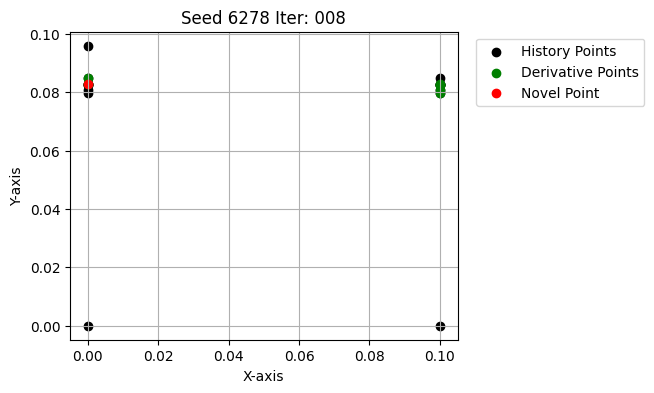

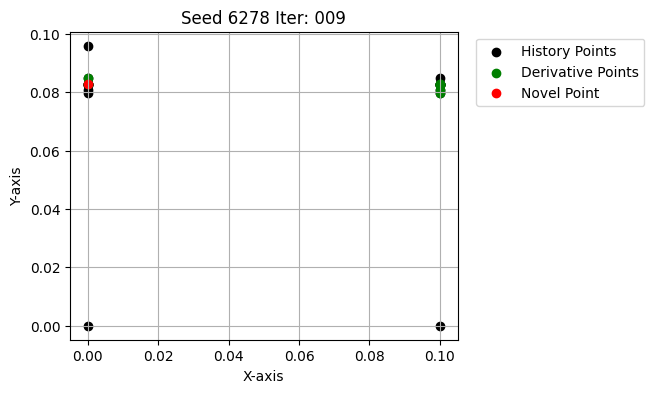

In [9]:
plot_search_history(data, seed=str(seed_to_plot))

## Average best outcome

In [10]:
outcomes = 0

for s in data.keys():
    s = str(s)
    history = data[s]['history']
    outcome = data[s]['outcome']
    repeat_point = data[s]['repeat_point']
    
    if repeat_point != [0.0, 0.0]:
        repeat_point_index = history.index(repeat_point)

        repeat_point_outcome = outcome[repeat_point_index]
    else:
        repeat_point_outcome = 0

    outcomes += repeat_point_outcome
print(f"Average best outcome: {outcomes / len(data.keys())}")

Average best outcome: -0.2528206224286991


## Check if all seeds converge

In [11]:
# find all seeds for which simulation did not converge
did_not_converge = []
for s in data.keys():
    s = str(s)
    if not data[s]['repeat_point']:
        did_not_converge.append(int(s))

In [12]:
sorted(did_not_converge)

[]

In [13]:
len(did_not_converge)

0

In [14]:
data['0']

{'history': [[0.10000001181173529, 0]],
 'history_iter': {'0': [[0.10000001181173529, 0]]},
 'novelhistory': [[0.10000001181173529, 0.0]],
 'outcome': [0.0578423772592806],
 'derivative_history': {},
 'repeat_point': [0.10000001181173529, 0.0],
 'cond_one': True,
 'cond_three': [True],
 'exercise_one': 'remains in the field phase',
 'frontier': ['f'],
 'switches': 0}

In [15]:
# check that condition one passed for all seeds
for s in data.keys():
    s = str(s)
    if data[s]['cond_one'] != True :
        print(f'condition one failed for seed {s}')

In [16]:
# check that condition three passed for all seeds
for s in data.keys():
    s = str(s)
    d = data[s]['cond_three']

    if sum(d) != len(data[s]['novelhistory']):
        print(f'CONDITION 3 failed for seed {s}')

## Exercise 1

For each seed, we will say that the seed ‘remains in the field phase’ if all the searched points have either x=0 or y=0, and ‘moves to the combinatoric phase’ if there exists at least one searched point that has x>0, y>0. We want to compute the share of seeds that remain in the field phase among those 10,000 seeds. 

In [ ]:
# From 10,000 seeds, how many are ‘remains in the field phase’ vs ‘moves to the combinatoric phase’?

In [17]:
field_phase = 0

for s in data.keys():
    s = str(s)
    if data[s]['exercise_one'] == 'remains in the field phase':
        field_phase += 1
        
print(f'From 10,000 seeds, {field_phase} remained in the field phase')
print(f'From 10,000 seeds, {len(data.keys()) - field_phase} moved to the combinatoric phase')

From 10,000 seeds, 9570 remained in the field phase
From 10,000 seeds, 430 moved to the combinatoric phase


## Exercise 2

For each seed, we want to count the number of novel points and the number of total points (novel + derivative) that were searched. We want to have one histogram that shows the frequency of seeds with a given number of novel points, and another histogram that shows the frequency of seeds with a given number of total points searched. 

In [ ]:
# compute number of novel points for all 10,000 seeds

In [18]:
novel_history_all_seeds, search_points_all_seeds = [], []

for s in range(len(data.keys())):
    s = str(s)
    novel_history_all_seeds.append(len(data[s]['novelhistory']))
    search_points_all_seeds.append(len(data[s]['history']))

In [ ]:
# make histogram

In [19]:
set(novel_history_all_seeds)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

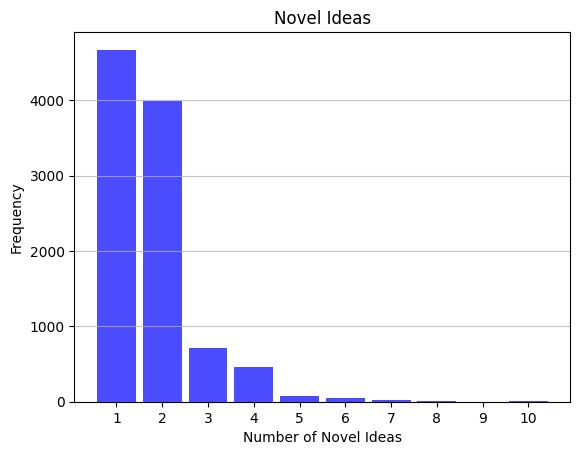

In [21]:
bins = np.arange(0.5, 10.5 + 1, 1)  

plt.hist(search_points_all_seeds, bins=bins, alpha=0.7, rwidth=0.85, color='blue')
plt.xticks(range(1, 11, 1))  
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Novel Ideas')
plt.ylabel('Frequency')
plt.title('Novel Ideas')
plt.show()

In [22]:
points_count = Counter(novel_history_all_seeds)

for point in range(1, 11):  
    print(f"Number of novel points -- {point}: {points_count[point]} times")

Number of novel points -- 1: 4672 times
Number of novel points -- 2: 3992 times
Number of novel points -- 3: 1052 times
Number of novel points -- 4: 168 times
Number of novel points -- 5: 62 times
Number of novel points -- 6: 30 times
Number of novel points -- 7: 11 times
Number of novel points -- 8: 10 times
Number of novel points -- 9: 1 times
Number of novel points -- 10: 2 times


In [23]:
set(search_points_all_seeds)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 18}

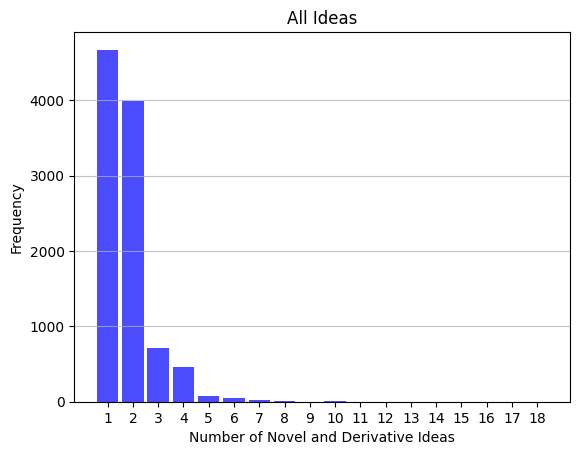

In [24]:
bins = np.arange(0.5, 18.5 + 1, 1)  

plt.hist(search_points_all_seeds, bins=bins, alpha=0.7, rwidth=0.85, color='blue')
plt.xticks(range(1, 19, 1))  
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Novel and Derivative Ideas')
plt.ylabel('Frequency')
plt.title('All Ideas')
plt.show()

In [26]:
points_count = Counter(search_points_all_seeds)

for point in range(1, 19):  
    print(f"Number of total search points -- {point}: {points_count[point]} times")

Number of total search points -- 1: 4672 times
Number of total search points -- 2: 3992 times
Number of total search points -- 3: 712 times
Number of total search points -- 4: 462 times
Number of total search points -- 5: 72 times
Number of total search points -- 6: 51 times
Number of total search points -- 7: 19 times
Number of total search points -- 8: 11 times
Number of total search points -- 9: 2 times
Number of total search points -- 10: 3 times
Number of total search points -- 11: 0 times
Number of total search points -- 12: 2 times
Number of total search points -- 13: 0 times
Number of total search points -- 14: 1 times
Number of total search points -- 15: 0 times
Number of total search points -- 16: 0 times
Number of total search points -- 17: 0 times
Number of total search points -- 18: 1 times


In [27]:
# find the seeds that have a certain length of novel points
def find_seends_with_novelhistory_point_num(data_dict, novelhistory_points_num=8):
    """
    Finds all seeds (keys) in the dictionary where the length of novelhistory is at a specified value.

    Parameters:
    data_dict (dict): The dictionary containing the data.
    novelhistory_points_num (int): The number of points in novelhistory 

    Returns:
    list: A list of keys that have a novelhistory length above the specified threshold.
    """
    seeds_with_novelhistory_above_threshold = [key for key, value in data_dict.items() if len(value['novelhistory']) == novelhistory_points_num]
    return seeds_with_novelhistory_above_threshold

In [28]:
seeds_with_novelhistory_8 = find_seends_with_novelhistory_point_num(data, novelhistory_points_num=8)

In [29]:
seeds_with_novelhistory_8

['3090',
 '3716',
 '5616',
 '6316',
 '3874',
 '1701',
 '3571',
 '7898',
 '6672',
 '6966']

In [30]:
data[seeds_with_novelhistory_8[0]]

{'history': [[0.10000001181173529, 0],
  [0.08732505418295988, 0],
  [0.06884438969378334, 0],
  [0.05869271659017394, 0],
  [0.06264453777238588, 0],
  [0.061252068379514746, 0],
  [0.06075719480530534, 0],
  [0.06103198378894534, 0]],
 'history_iter': {'0': [[0.10000001181173529, 0]],
  '1': [[0.08732505418295988, 0]],
  '2': [[0.06884438969378334, 0]],
  '3': [[0.05869271659017394, 0]],
  '4': [[0.06264453777238588, 0]],
  '5': [[0.061252068379514746, 0]],
  '6': [[0.06075719480530534, 0]],
  '7': [[0.06103198378894534, 0]]},
 'novelhistory': [[0.10000001181173529, 0.0],
  [0.08732505418295988, 0.0],
  [0.06884438969378334, 0.0],
  [0.05869271659017394, 0.0],
  [0.06264453777238588, 0.0],
  [0.061252068379514746, 0.0],
  [0.06075719480530534, 0.0],
  [0.06103198378894534, 0.0]],
 'outcome': [0.14449932127491288,
  0.20094353278631538,
  0.14213759784517488,
  -0.09825545005682346,
  0.059179928495398645,
  0.03107534810008462,
  -0.037907481832038514,
  -0.003744155277093042],
 'der

## Exercise 3

For each seed, in each iteration, we want to check whether the searched point is in the frontier of the search history so far.  

Finally, we want to have a histogram that shows the frequency of seeds with any given number of switches. 


In [ ]:
# compute number of switches for all 10,000 seeds

In [31]:
switches_all_seeds = []

for s in range(10000):
    s = str(s)
    switches_all_seeds.append(data[s]['switches'])


In [32]:
len(switches_all_seeds)

10000

In [33]:
switches_all_seeds[0]

0

In [34]:
set(switches_all_seeds)

{0, 1, 2, 3}

In [35]:
switch_count = Counter(switches_all_seeds)

for s in range(0, 4):  
    print(f"Number of switches -- {s}: {switch_count[s]} times")

Number of switches -- 0: 9550 times
Number of switches -- 1: 446 times
Number of switches -- 2: 3 times
Number of switches -- 3: 1 times


In [ ]:
# plot histogram

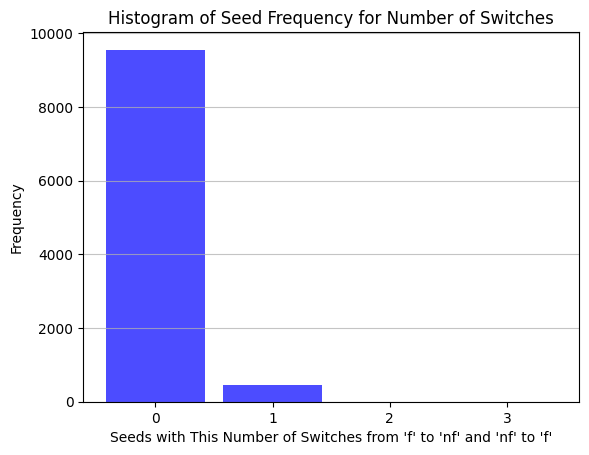

In [36]:
plt.hist(switches_all_seeds, bins=[-0.5, 0.5, 1.5, 2.5, 3.5], alpha=0.7, rwidth=0.85, color='blue')
plt.xticks([0, 1, 2, 3])  # Set x-ticks to the actual switch values
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Seeds with This Number of Switches from 'f' to 'nf' and 'nf' to 'f'")
plt.ylabel("Frequency")
plt.title("Histogram of Seed Frequency for Number of Switches")
plt.show()

In [ ]:
# find the seeds that have a certain number of switches

In [37]:
def find_seeds_with_switches(data_dict, num_switches):
    """
    Finds all seeds (keys) in the dictionary of results with a specific number of switches.

    Parameters:
    data_dict (dict): The dictionary containing the data.
    num_switches (int): The number of switches to filter by.

    Returns:
    list: A list of seeds (keys) that have the specified number of switches.
    """
    seeds_with_switches = [key for key, value in data_dict.items() if value['switches'] == num_switches]
    return seeds_with_switches


In [38]:
seeds_with_2_switches = find_seeds_with_switches(data, 2)

In [39]:
len(seeds_with_2_switches)

3

In [40]:
seeds_with_2_switches

['8844', '5054', '6150']

In [ ]:
# display the data for found seeds

In [41]:
data['5054']

{'history': [[0.10000001181173529, 0],
  [0, 0.09590859828610256],
  [0, 0.08760478669482197],
  [0.006531377041480609, 0.08760478669482197],
  [0.006531377041480609, 0.09590859828610256],
  [0.006531377041480609, 0]],
 'history_iter': {'0': [[0.10000001181173529, 0]],
  '1': [[0, 0.09590859828610256]],
  '2': [[0, 0.08760478669482197]],
  '3': [[0.006531377041480609, 0.08760478669482197],
   [0.006531377041480609, 0.09590859828610256],
   [0.006531377041480609, 0]]},
 'novelhistory': [[0.10000001181173529, 0.0],
  [0.0, 0.09590859828610256],
  [0.0, 0.08760478669482197],
  [0.006531377041480609, 0.09590859828610256]],
 'outcome': [-1.1740011020807226,
  0.11738213983248547,
  0.16266648878287254,
  0.09605968654291677,
  0.05265139940842928,
  -0.658978943980068],
 'derivative_history': {'3': [[0.006531377041480609, 0.08760478669482197],
   [0.006531377041480609, 0]]},
 'repeat_point': [0.006531377041480609, 0.09590859828610256],
 'cond_one': True,
 'cond_three': [True, True, True, Tr

In [42]:
seeds_with_3_switches = find_seeds_with_switches(data, 3)

In [43]:
seeds_with_3_switches

['4585']

In [44]:
data[seeds_with_3_switches[0]] # display data for seed 4585

{'history': [[0.10000001181173529, 0],
  [0, 0.09590841958504852],
  [0, 0.0949246468717923],
  [0.10000001181173529, 0.0949246468717923],
  [0.10000001181173529, 0.09590841958504852],
  [0, 0.09541142904042538],
  [0.10000001181173529, 0.09541142904042538]],
 'history_iter': {'0': [[0.10000001181173529, 0]],
  '1': [[0, 0.09590841958504852]],
  '2': [[0, 0.0949246468717923]],
  '3': [[0.10000001181173529, 0.0949246468717923]],
  '4': [[0.10000001181173529, 0.09590841958504852]],
  '5': [[0, 0.09541142904042538], [0.10000001181173529, 0.09541142904042538]]},
 'novelhistory': [[0.10000001181173529, 0.0],
  [0.0, 0.09590841958504852],
  [0.0, 0.0949246468717923],
  [0.10000001181173529, 0.0949246468717923],
  [0.10000001181173529, 0.09590841958504852],
  [0.10000001181173529, 0.09541142904042538]],
 'outcome': [-0.7098426055094411,
  0.07638142765465528,
  0.10882770599746105,
  0.02463663436670521,
  -0.024664749715620778,
  0.0835065620041846,
  -0.005270184910757957],
 'derivative_his